In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE



📊 KATILIMCI ÖZETİ (TABLO)


,Yas,Guven,Beceri,Niyet
count,375.000000,375.000000,375.000000,375.000000
mean,39.693333,3.045333,3.114667,3.064000
std,12.565522,1.401135,1.414279,1.437154
min,18.000000,1.000000,1.000000,1.000000
25%,28.000000,2.000000,2.000000,2.000000
50%,40.000000,3.000000,3.000000,3.000000
75%,51.500000,4.000000,4.000000,4.000000
max,60.000000,5.000000,5.000000,5.000000


C:\Users\elifv\AppData\Local\Temp\ipykernel_26220\286081516.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Niyet', data=df, palette='viridis')


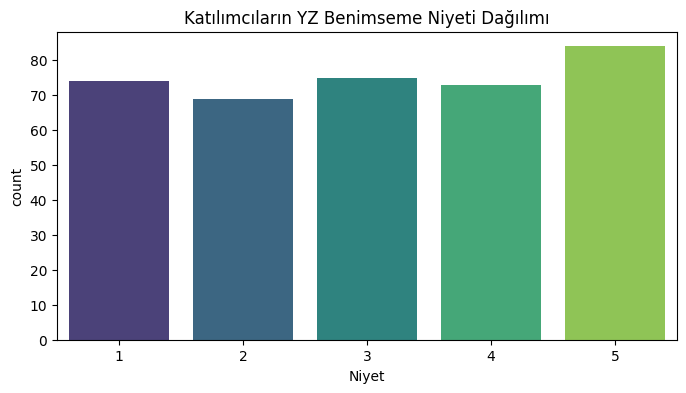

In [48]:
# Veriyi Oku
df = pd.read_csv('data/veriseti.csv')
df.columns = ['Zaman', 'Yas', 'Egitim', 'Araclar', 'Siklik', 'Guven', 'Kontrol', 'Beceri', 'Motivasyon', 'Niyet']

# TABLO: Genel İstatistikler
print("📊 KATILIMCI ÖZETİ (TABLO)")
display(df[['Yas', 'Guven', 'Beceri', 'Niyet']].describe())

# GRAFİK: Niyet Dağılımı
plt.figure(figsize=(8, 4))
sns.countplot(x='Niyet', data=df, palette='viridis')
plt.title('Katılımcıların YZ Benimseme Niyeti Dağılımı')
plt.show()






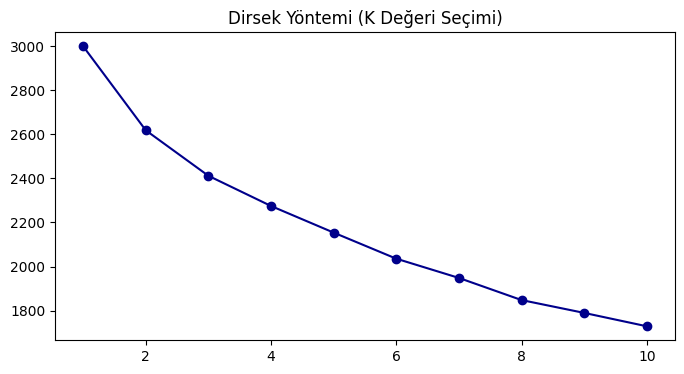

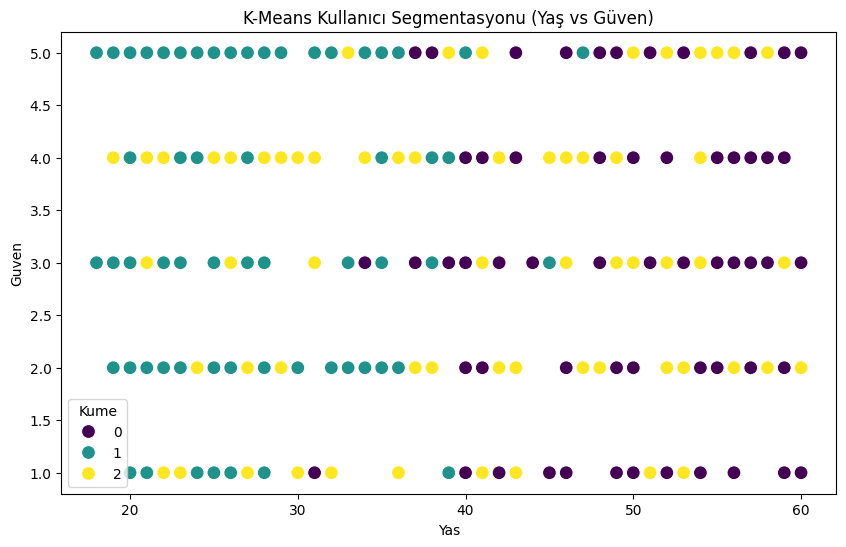

✅ Blok 2 Tamam: Kullanıcılar 3 gruba ayrıldı.
        Yas  Guven  Niyet
Kume                     
0     49.83   2.98   3.11
1     28.78   3.29   3.02
2     40.48   2.89   3.06


In [33]:
# Dirsek Yöntemi
wcss = []
k_limit = min(len(df_analiz), 11)
for i in range(1, k_limit):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, k_limit), wcss, marker='o', color='darkblue')
plt.title('Dirsek Yöntemi (K Değeri Seçimi)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_analiz, x='Yas', y='Guven', hue='Kume', palette='viridis', s=100)
plt.title('K-Means Kullanıcı Segmentasyonu (Yaş vs Güven)')
plt.show()



# Kümeleme (K=3)
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
df_analiz['Kume'] = kmeans_model.fit_predict(X_scaled)

print("✅ Blok 2 Tamam: Kullanıcılar 3 gruba ayrıldı.")
print(df_analiz.groupby('Kume')[['Yas', 'Guven', 'Niyet']].mean().round(2))

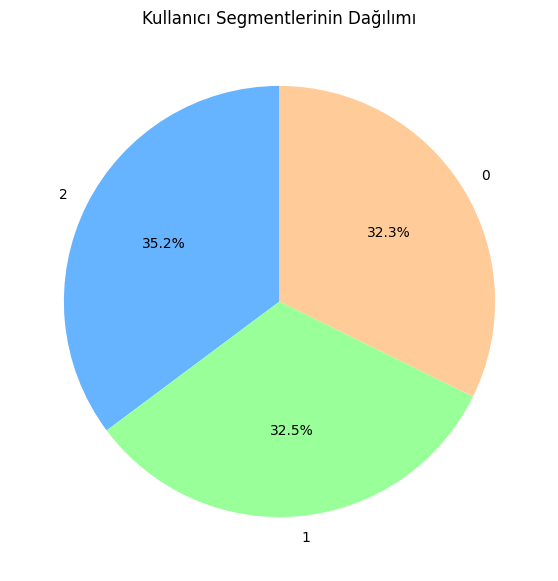

In [44]:
# Kümelerin dağılımını gösteren pasta grafiği
plt.figure(figsize=(7, 7))
df_analiz['Kume'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'], startangle=90)
plt.title('Kullanıcı Segmentlerinin Dağılımı')
plt.ylabel('')
plt.show()

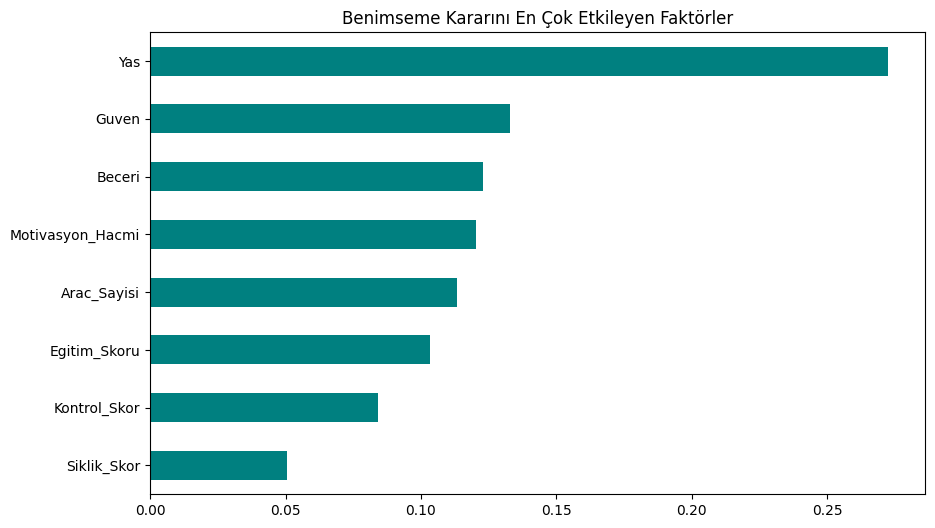

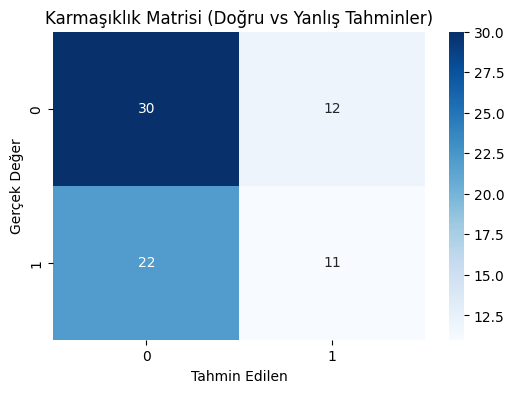

✅ Blok 3 Tamam: Model Doğruluğu %54.67
✅ Tüm modeller başarıyla kaydedildi:
- yz_benimseme_rf_modeli.pkl (Sınıflandırma)
- yz_benimseme_kmeans_modeli.pkl (Kümeleme)
- yz_benimseme_scaler.pkl (Veri Ölçeklendirme)


In [ ]:
# Hedef: Niyet >= 4 ise 1 (Yüksek), Değilse 0
y = np.where(df_analiz['Niyet'] >= 4, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Eğitimi
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Özellik Önemi Grafiği
plt.figure(figsize=(10, 6))
pd.Series(rf_model.feature_importances_, index=oznitelikler).sort_values().plot(kind='barh', color='teal')
plt.title("Benimseme Kararını En Çok Etkileyen Faktörler")
plt.show()

cm = confusion_matrix(y_test, rf_model.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Karmaşıklık Matrisi (Doğru vs Yanlış Tahminler)')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

print(f"✅ Blok 3 Tamam: Model Doğruluğu %{accuracy_score(y_test, rf_model.predict(X_test))*100:.2f}")


import joblib
import os

# 1. 'models' adında bir klasör oluştur (eğer yoksa)
if not os.path.exists('models'):
    os.makedirs('models')
    print("📁 'models' klasörü oluşturuldu.")

# 2. Modelleri 'models' klasörünün içine kaydet
joblib.dump(rf_model, 'models/yz_benimseme_rf_modeli.pkl')
joblib.dump(kmeans_model, 'models/yz_benimseme_kmeans_modeli.pkl')
joblib.dump(scaler, 'models/yz_benimseme_scaler.pkl')

print("✅ Modeller 'models/' dizinine başarıyla kaydedildi.")

In [27]:
def yz_benimseme_testi():
    print("\n" + "🤖 " * 10)
    print("  YZ BENİMSEME KARAR DESTEK SİSTEMİ")
    print(" " * 10 + "🤖 " * 10)
    
    try:
        # 1. YAŞ
        yas = int(input("\n1) Yaşınız: "))

        # 2. EĞİTİM
        print("\n2) En yüksek eğitim durumunuz nedir?")
        print("   1: Lise veya altı\n   2: Ön Lisans\n   3: Lisans\n   4: Yüksek Lisans/Doktora")
        e_secim = int(input("Seçiminiz (1-4): "))

        # 3. GÜVEN (LİKERT)
        print("\n3) Üretken Yapay Zekâ araçlarından elde ettiğiniz çıktıların doğruluğuna ne derece güveniyorsunuz?")
        print("   (1: Hiç Güvenmiyorum - 5: Tamamen Güveniyorum)")
        guven = int(input("Puanınız (1-5): "))

        # 4. BECERİ (LİKERT)
        print("\n4) Üretken Yapay Zekâ araçlarını kullanma beceriniz ne düzeydedir?")
        print("   (1: Çok Düşük - 5: Çok Yüksek)")
        beceri = int(input("Puanınız (1-5): "))

        # 5. ARAÇLAR (ÇOKLU SEÇİM)
        print("\n5) Hangi araçları kullandınız? (Virgülle girin, örn: 1,3)")
        print("   1: ChatGPT, 2: Gemini, 3: Copilot, 4: Görsel YZ, 5: Kod YZ, 6: Hiçbiri")
        a_secim = input("Seçimleriniz: ")
        arac_sayisi = 0 if '6' in a_secim else len([x for x in a_secim.split(',') if x.strip()])

        # 6. SIKLIK
        print("\n6) Üretken Yapay Zekâ araçlarını ne sıklıkla kullanıyorsunuz?")
        print("   1: Günlük (Birden fazla kez)\n   2: Günlük (1 kez)\n   3: Haftada birkaç kez")
        print("   4: Ayda birkaç kez\n   5: Çok nadiren\n   6: Hiç kullanmıyorum")
        s_secim = int(input("Seçiminiz (1-6): "))
        siklik_skor = 7 - s_secim 

        # 7. KONTROL
        print("\n7) YZ çıktılarının doğruluğunu kontrol etme alışkanlığınız nasıldır?")
        print("   1: Evet, daima kontrol ederim.\n   2: Hayır, sadece kritik durumlarda kontrol ederim.\n   3: Hayır, genellikle kontrol etmem.")
        k_secim = int(input("Seçiminiz (1-3): "))
        kontrol_skor = 4 - k_secim 

        # 8. MOTİVASYON (ÇOKLU SEÇİM)
        print("\n8) YZ kullanma motivasyonlarınız neler? (Virgülle girin: 1,2,5)")
        print("   1: Verimlilik, 2: Yaratıcılık, 3: Merak, 4: İş/Okul Görevleri, 5: Yeni Şeyler Öğrenmek")
        m_secim = input("Seçimleriniz: ")
        mot_hacmi = len([x for x in m_secim.split(',') if x.strip()])

        # TAHMİN
        girdi_df = pd.DataFrame([[yas, e_secim, guven, beceri, siklik_skor, kontrol_skor, mot_hacmi, arac_sayisi]], 
                               columns=oznitelikler)
        girdi_scaled = pd.DataFrame(scaler.transform(girdi_df), columns=oznitelikler)
        
        olasılık = rf_model.predict_proba(girdi_scaled)[0][1]
        kume_no = kmeans_model.predict(girdi_scaled)[0]

        print("\n" + "🏁" * 20)
        print(f"📊 SONUÇ: %{olasılık*100:.1f} Benimseme Potansiyeli")
        print(f"👥 KULLANICI PROFİLİ: Küme {kume_no}")
        print("-" * 40)

        if olasılık > 0.75:
            print("🚀 SİZ BİR 'TEKNOLOJİ ELÇİSİ'SİNİZ. Geleceğin öncülerindensiniz.")
        elif guven < 3:
            print("⚠️ DURUM: 'Güven Bariyeri' tespit edildi. Veri doğrulama teknikleri önerilir.")
        else:
            print("📈 DURUM: 'Gelişmekte Olan Kullanıcı'. Pratiklerinizi artırabilirsiniz.")
        print("🏁" * 20)

    except Exception as e:
        print(f"❌ Hata: {e}")

# Başlat
yz_benimseme_testi()


🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 
  YZ BENİMSEME KARAR DESTEK SİSTEMİ
          🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 

2) En yüksek eğitim durumunuz nedir?
   1: Lise veya altı
   2: Ön Lisans
   3: Lisans
   4: Yüksek Lisans/Doktora

3) Üretken Yapay Zekâ araçlarından elde ettiğiniz çıktıların doğruluğuna ne derece güveniyorsunuz?
   (1: Hiç Güvenmiyorum - 5: Tamamen Güveniyorum)

4) Üretken Yapay Zekâ araçlarını kullanma beceriniz ne düzeydedir?
   (1: Çok Düşük - 5: Çok Yüksek)

5) Hangi araçları kullandınız? (Virgülle girin, örn: 1,3)
   1: ChatGPT, 2: Gemini, 3: Copilot, 4: Görsel YZ, 5: Kod YZ, 6: Hiçbiri

6) Üretken Yapay Zekâ araçlarını ne sıklıkla kullanıyorsunuz?
   1: Günlük (Birden fazla kez)
   2: Günlük (1 kez)
   3: Haftada birkaç kez
   4: Ayda birkaç kez
   5: Çok nadiren
   6: Hiç kullanmıyorum

7) YZ çıktılarının doğruluğunu kontrol etme alışkanlığınız nasıldır?
   1: Evet, daima kontrol ederim.
   2: Hayır, sadece kritik durumlarda kontrol ederim.
   3: Hayır, genellikle kontrol etmem.

8) YZ k